## Исследование данных о российском кинопрокате



**Анализ российского кинопроката** <br>
Будет исследован набор данных, содержащий информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. <br>
**Цель проекта**: изучить рынок российского кинопроката и выявить текущие тренды.<br><br>
/datasets/mkrf_movies.csv — данные о прокатных удостоверениях. <br>

/datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах. <br> <br>
**План исследования:**<br>
1) Проверить набор данных на целостность и корректность. Обработать пропуски, аномалии и другие ошибки в данных<br>
2) Найти общие тренды и закономерности в данных<br>
3) Исследовать фильмы с гос поддержкой<br>
4) Написать общий вывод о проделанной работе<br>

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 7000

In [3]:
df = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [4]:
df_size_start = df.shape[0] # сохраняю размер датасета, чтобы потом посчитать, сколько останется от изначального размера
df_size_start

7486

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [7]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Объединять таблицы нужно по столбцу puNumber, но в таблицах он разного типа. Сначала нужно привести к одному типу. Сразу это сделать не получилось, т.к. в данном столбце таблицы есть нечисловые значения, сперва найду их.

In [9]:
df[~df.puNumber.str.contains(r'[0-9]')] # решение взял на stackoverflow, сначала обращаюсь к столбцу таблицы,
                                        # используя его имя как атрибут, а затем через регулярное выражение ищу значения, 
                                        # содержащие только цифры.
                                        # т.к. на все выражение стоит отрицание, получаю только не цифры

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Такая строчка всего одна, удалю ее

In [10]:
df = df.loc[df['puNumber'] != 'нет'].reset_index(drop=True)
df[1795:1800]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1795,Гаэтано Доницетти. Лукреция Борджиа /По мотива...,126001614,2014-05-05T12:00:00.000Z,Прочие,Ризинг Альтернатин,Италия,Джон Паско,"Джессика Коплос, Мэттью Шилвок",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN
1796,Букашки. Приключение в Долине Муравьев,124001414,2014-04-29T12:00:00.000Z,Анимационный,"Антре Шьен э Лу, Футурикон, Нозон",Франция,"Хелен Жиро, Томас Забо","Филипп Делару, Себастьен Деллуа",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"мультфильм,приключения,семейный"
1797,12 месяцев,111003613,2013-08-23T12:00:00.000Z,Художественный,"ООО Производственная компания ""ГофроПак"", ООО ...",Россия,А.Баршак,"М.Боев, Л.Могилевский, А.Калинкин, В.Пономаренко",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.9,комедия
1798,ИУДА,111004013,2013-09-09T12:00:00.000Z,Художественный,"ООО ""АБС""",Россия,А.Богатырев,Е.Белова,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.3,"биография,драма,история"
1799,Опасная иллюзия,121000414,2014-01-17T12:00:00.000Z,Художественный,"МедиаПро Пикчерз, Бона Файд Продакшнз",Румыния-США,Фредерик Бонд,"Альберт Бергер, Крэйг Дж. Флорес, Уильям Хорберг",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"триллер,криминал,боевик"


In [11]:
df['puNumber'] = df['puNumber'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [13]:
df = df.merge(mkrf_shows, left_on='puNumber', right_on='puNumber', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

Переименую столбец puNumber

In [14]:
df = df.rename(columns={'puNumber': 'pu_number'})

Для удобной работы со столбцом возрастных ограничений переведу текстовые значения в соответствующие числовые

In [15]:
df['age_restriction'] = df['age_restriction'].replace({'«0+» - для любой зрительской аудитории': 0,
                                                       '«6+» - для детей старше 6 лет': 6,
                                                       '«12+» - для детей старше 12 лет': 12,
                                                       '«16+» - для детей старше 16 лет': 16,
                                                       '«18+» - запрещено для детей': 18})

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   int64  
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Приведу данные к соответствующим типам

In [17]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M%S', exact = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   int64         
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

В некоторых строках рейтинг представлен в процентах, приведем их к типу float

In [18]:
df[df.ratings.str.contains('%', na=False, regex=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",16,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",12,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,121029212,2012-11-29 12:00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",16,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,6,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1804,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,12,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1873,Короткие истории о любви 2,121002615,2015-02-13 12:00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",18,NaN,NaN,NaN,NaN,83%,NaN,"1,429,859.00"
1898,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",6,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2125,Поездка к матери,111002015,2015-03-02 12:00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,16,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.00
2145,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,6,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2437,Самый рыжий Лис,111012715,2015-07-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",6,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


In [19]:
df.loc[df.ratings.str.contains('%', na=False, regex=False), 'ratings'] = df[df.ratings.str.contains('%', na=False, regex=False)]['ratings'].str.rstrip('%').astype('float') / 10.0

In [20]:
df['ratings'] = df['ratings'].astype('float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   int64         
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [22]:
df['film_studio'].isna().sum()

18

In [23]:
df['production_country'].isna().sum()

2

In [24]:
df['director'].isna().sum()

9

In [25]:
df['producer'].isna().sum()

568

Пропусков мало, это пропуски в категориальных данных - на мой взгляд, статистическими методами заполнять категориальные данные некорректно, можно их удалить.

In [26]:
df = df[~df['film_studio'].isna()].reset_index(drop=True)
df = df[~df['production_country'].isna()].reset_index(drop=True)
df = df[~df['director'].isna()].reset_index(drop=True)
df = df[~df['producer'].isna()].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6894 entries, 0 to 6893
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6894 non-null   object        
 1   pu_number              6894 non-null   int64         
 2   show_start_date        6894 non-null   datetime64[ns]
 3   type                   6894 non-null   object        
 4   film_studio            6894 non-null   object        
 5   production_country     6894 non-null   object        
 6   director               6894 non-null   object        
 7   producer               6894 non-null   object        
 8   age_restriction        6894 non-null   int64         
 9   refundable_support     330 non-null    float64       
 10  nonrefundable_support  330 non-null    float64       
 11  budget                 330 non-null    float64       
 12  financing_source       330 non-null    object        
 13  rat

Данных в столбцах  refundable_support, nonrefundable_support, budget недостаточно, чтобы на их основе заполнять пропуски. Оставлю данные столбцы без изменений.

Пропуски в столбцах genres и financing_source заполню 'unknown'

In [27]:
df['genres'] = df['genres'].fillna('unknown')
df['financing_source'] = df['financing_source'].fillna('unknown')

Столбцы ratings и box_office являются целевыми в данной выборке - по ним определяется, на сколько фильм успешный.<br><br>
Считаю правильным решением оставить их без изменений.

In [28]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       6564
nonrefundable_support    6564
budget                   6564
financing_source            0
ratings                   860
genres                      0
box_office               3855
dtype: int64

Выясню, какой процент от первоначального размера датасета остался после обработки пропусков

In [29]:
df.shape[0] / df_size_start * 100

92.09190488912637

Осталось 92%, данных достаточно для анализа

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [30]:
df.duplicated().sum()

0

Явных дубликатов нет, проверю на неявные

In [31]:
len(df['director'].unique())

4474

In [32]:
len(df['title'].unique())

6195

In [33]:
df['director'] = df['director'].str.lower()
df['producer'] = df['producer'].str.lower()
df['film_studio'] = df['film_studio'].str.lower()

In [34]:
len(df['director'].unique())

4470

In [35]:
len(df['title'].unique())

6195

In [36]:
df.duplicated(subset=['director', 'title']).sum()

674

Наличие дубликатов по названию фильма и режиссера ни о чем не говорит. Один и тот же фильм мог несколько раз выходить в прокат. Нужно добавить соответствие по дате начала показа.

In [38]:
df[df.duplicated(subset=['director', 'title', 'show_start_date'])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1059,Эпидемия_,221035513,2013-10-07 12:00:00,Художественный,"морена фильм, ребелион террестр, а 3 медиа гру...",Испания - Франция,"алекс пастор, давид пастор","мерседес гамеро, альберто марини, педро уриоль",16,NaN,NaN,NaN,unknown,7.20,"драма,фантастика,триллер",NaN
1228,Оторвы,221013214,2014-04-07 12:00:00,Художественный,"проминент пикчерз, ворлдвью интертейнмент, инд...",США,кристофер нельсон,"молли коннерс, хезер рэй",16,NaN,NaN,NaN,unknown,3.50,"комедия,приключения",NaN
1870,Последние пять лет.,121005715,2015-03-25 12:00:00,Художественный,"гранд пикс интертейнмент, лаки манки пикчерз, ...",США,ричард лагравенес,"джанет бреннер, лорен версель, курт дойтч, рич...",16,NaN,NaN,NaN,unknown,5.70,"мюзикл,драма,мелодрама","52,495.00"
2347,Пингвиненок Пороро: Большие гонки,124001915,2015-04-15 12:00:00,Анимационный,"окон студиос, чина филм, симка интертейнмент, ...",Южная Корея - КНР,юнг куюн парк,"иль хо ким, михал симка",0,NaN,NaN,NaN,unknown,5.20,"мультфильм,семейный,спорт","14,152,495.90"
2680,Анархисты,121002316,2016-02-03 12:00:00,Художественный,"24 май продюксьон, франс 2 синема",Франция,эли важеман,лола гэнс,16,NaN,NaN,NaN,unknown,5.70,драма,"332,371.00"
3591,Бугай,124001210,2010-09-24 12:00:00,Анимационный,"иллюзион студиос, процесо",Мексика-Аргентина,густаво кова,"хуго е. лаура, хосе луис масса",16,NaN,NaN,NaN,unknown,6.60,"мультфильм,боевик,триллер",NaN
5880,Зоя,111022718,2018-11-25 12:00:00,Художественный,тарханова юлия олеговна,Россия,о.товма,ю.тарханова,16,NaN,NaN,NaN,unknown,3.90,"история,биография,военный",NaN


Удалю данные строки

In [39]:
df = df[~df.duplicated(subset=['director', 'title', 'show_start_date'])]
df.shape

(6887, 16)


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [40]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

В столбце есть неявные дубликаты, избавимся от них

In [41]:
df['type'] = df['type'].str.strip()
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [42]:
df['age_restriction'].unique()

array([18, 16, 12,  0,  6])

С возрастными категориями все в порядке.

In [43]:
df['financing_source'] = df['financing_source'].str.lower()
df['financing_source'].unique()

array(['unknown', 'министерство культуры', 'фонд кино',
       'министерство культуры, фонд кино'], dtype=object)

Данные об источнике гос. финансирования корректные.

In [44]:
df['genres'] = df['genres'].str.lower()
df['genres'].unique()

array(['боевик,драма,мелодрама', 'фантастика,боевик,триллер',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'драма,спорт',
       'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,семейный', 'боевик,драма,криминал',
       'ужасы,фантастика,комедия', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мелодрама,комедия', 'драма,мелодрама,комедия', 'unknown',
       'боевик,триллер,драма', 'боевик,комедия,криминал',
       'комедия,мелодрама,драма', 'мультфильм,фэнтези,комедия',
       'драма,мелодрама,военный', 'мультфильм,приключения,семейный',
       'мультфильм,драма,комедия', 'драма,мелодрама', 'триллер,криминал',
       'военный,биография,драма', 'драма,семейный,биография',
       'фэнтези,приключения,семейный', 'драма,криминал,биография',
       'боевик,история,драма', 'драма,биография,история',
       'уж

In [45]:
df['production_country'] = df['production_country'].str.lower()
df['production_country'].unique()

array(['сша', 'франция', 'германия-великобритания',
       'великобритания - италия', 'сша - франция - турция',
       'новая зеландия', 'канада - франция - испания', 'сша-германия',
       'сша - великобритания', 'великобритания', 'сша - германия',
       'франция - мексика - сша', 'германия',
       'великобритания-сша-германия-кнр', 'гонконг, кнр', 'сша - франция',
       'сша - япония - франция - великобритания',
       'гонконг - сингапур - таиланд - великобритания', 'сша-канада',
       'франция - сша', 'ирландия-великобритания-германия',
       'сша-австралия', 'сша-франция-великобритания-австрия',
       'сша - бельгия', 'сша - ирландия - великобритания',
       'люксембург - нидерланды - испания - великобритания - сша - италия',
       'великобритания - франция - сша', 'новая зеландия - сша',
       'сша - великобритания - чехия',
       'канада - франция - великобритания', 'ирландия',
       'великобритания - германия - сша',
       'сша - франция - великобритания', 'франция 

In [46]:
df['pu_number'].duplicated().sum()

2

In [47]:
df.loc[df['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4159,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"константин фильм, а эр ди дегето фильм, дюне ...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",16,NaN,NaN,NaN,unknown,7.60,"драма,мелодрама,история",NaN
4581,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",12,NaN,NaN,NaN,unknown,6.80,"комедия,криминал",NaN


In [48]:
df.loc[df['pu_number'].isin([221154310, 221054410])]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4158,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"ше вам, скрипт ассосье, тэ фэ 1 фильм продюксь...",франция,эрик лартиго,"амандин било, алан шаба",16,NaN,NaN,NaN,unknown,7.00,"мелодрама,комедия",NaN
4159,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"константин фильм, а эр ди дегето фильм, дюне ...",германия - великобритания - италия - испания,зенке вортманн,"оливер бербен, дорис д.хайнце, фарук элтан",16,NaN,NaN,NaN,unknown,7.60,"драма,мелодрама,история",NaN
4580,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"уорнер бразерс, вилладж роудшоу филмз лтд",сша-австралия,хэрольд рэмис,"джейн розенталь, пола уейнстейн",16,NaN,NaN,NaN,unknown,7.40,"комедия,криминал",NaN
4581,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"уорнер бразерс, виллидж роадшоу пикчерз, эн-пи...",сша,гарольд реймис,"джейн розенталь, паул уэйнстейн",12,NaN,NaN,NaN,unknown,6.80,"комедия,криминал",NaN


221054410 это две части фильма, а в случае с 221154310 явно ошибка. Удалю фильмы с pu_number 221154310

In [49]:
df = df.loc[df['pu_number'] != '221154310'].reset_index(drop=True)

Категориальные данные - данные, которые могут принимать ограниченное число значений. Их нельзя суммировать, отнимать, умножать и тд, даже если они представлены в числовом виде. <br>
Нам не удастся корректно сгруппировать данные по столбцам с жанром и страной производства. Хоть это и категориальные данные, но они представленны некорректно. Нужно будет выделить главные данные из них.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [50]:
(df['nonrefundable_support'] + df['refundable_support'] >= df['budget']).sum()

17

У некоторых фильмов несостыковка в бюджете. В налоговую пока звонить не буду.

In [51]:
df.loc[df['nonrefundable_support'] + df['refundable_support'] >= df['budget']]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1752,14+,111023614,2014-12-19 12:00:00,Художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",16,0.00,"23,000,000.00",0.00,"министерство культуры, фонд кино",6.60,мелодрама,"10,234,016.10"
1753,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",16,0.00,"75,000,000.00",0.00,фонд кино,6.60,драма,"446,163,511.00"
2089,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",12,"10,000,000.00","70,000,000.00",0.00,фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2148,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,16,"20,000,000.00",0.00,0.00,фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2213,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,6,"60,000,000.00","100,000,000.00",0.00,фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2279,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",18,0.00,"59,000,000.00",0.00,фонд кино,6.30,"комедия,драма","1,957,738.51"
2378,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",16,0.00,"35,000,000.00",0.00,фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2464,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",12,0.00,"6,000,000.00",0.00,министерство культуры,4.30,комедия,"15,362,931.43"
2636,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",16,"19,000,000.00","51,000,000.00",0.00,фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3121,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",12,0.00,"250,000,000.00",0.00,фонд кино,5.60,фантастика,"1,038,321,489.00"


В строках не заполнен столбец общего бюджета. Заполним пропуски, считая budget = nonrefundable_support + refundable_support

In [52]:
df.loc[df['budget']==0, 'budget'] = df.loc[df['budget']==0, 'refundable_support'] + df.loc[df['budget']==0, 'nonrefundable_support']

In [53]:
len(df.loc[df['budget'] == 0])

0

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [54]:
df['year_start'] = df['show_start_date'].dt.year
df['year_start'].unique()

array([2015, 2016, 2014, 2013, 2012, 2017, 2010, 2011, 2018, 2019])

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [55]:
def get_main_value(value):
    return value.split(',')[0]

In [56]:
df['main_genre'] = df['genres'].apply(get_main_value)
df['main_genre'].sort_values().unique()

array(['unknown', 'аниме', 'биография', 'боевик', 'вестерн', 'военный',
       'детектив', 'детский', 'для взрослых', 'документальный', 'драма',
       'история', 'комедия', 'концерт', 'короткометражка', 'криминал',
       'мелодрама', 'музыка', 'мультфильм', 'мюзикл', 'приключения',
       'реальное тв', 'семейный', 'спорт', 'триллер', 'ужасы',
       'фантастика', 'фильм-нуар', 'фэнтези'], dtype=object)

In [57]:
df['main_director'] = df['director'].apply(get_main_value)
len(df['main_director'].sort_values().unique())

4301

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [58]:
# данный столбец понадобится в дальнейшем для исследований
df['gov_support'] = df['refundable_support'] + df['nonrefundable_support']

In [59]:
df['gov_support_ratio'] = df['gov_support'] / df['budget']
df['gov_support_ratio'].mean()

0.5413861681086368

**Вывод**:<br> 
Данные из двух файлов были объединены в один датафрейм путем сопоставления прокатных удостоверений, представленных в двух файлах. Важно упомянуть о наличии одного пропуска в столбце с номером прокатного удостоверения. Соответствующая строка была удалена.<br>
Также предприняты следующие действия:<br>

1) Удалены строки с пропусками в столбцах film_studio, production_country, director, producer<br>
2) Пропуски в столбцах genres и financing_source заполнены 'unknown'<br>
3) Пропуски в столбцах refundable_support, nonrefundable_support, budget оставлены без изменений<br>

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

Под "информацией о прокате" я понимаю размер сборов

Узнаем распределение количества фиьмов по годам

In [60]:
(df
 .pivot_table(
     index='year_start', 
     values='pu_number',
     aggfunc='count'
 )
)

,pu_number
year_start,
2010,943
2011,605
2012,566
2013,539
2014,615
2015,626
2016,762
2017,471
2018,864


In [61]:
len(df.loc[~df['box_office'].isna()]) / len(df)

0.4408305503121824

В датасете представленно 44% показов с информацией о сборах, посмотрим, как это значение меняется по годам

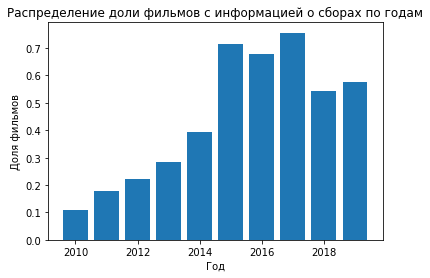

In [62]:
year_list = df['year_start'].sort_values().unique()
ratio_list = []
year_ratio = 0
for year in year_list:
    ratio_list.append(len(df.loc[(~df['box_office'].isna()) & (df['year_start']==year)]) / len(df.loc[df['year_start']==year]))

fig, ax = plt.subplots()
ax.bar(year_list, ratio_list)
ax.set_ylabel('Доля фильмов')
ax.set_xlabel('Год')
ax.set_title('Распределение доли фильмов с информацией о сборах по годам')
plt.show()

Самым полным периодом следует считать 2015-2017 года. До 2014 включительно информации слишком мало. Начиная с 2018, наблюдается спад осведомленности о сборах.

Посмотрим на график зависимости количества фильмов по годам

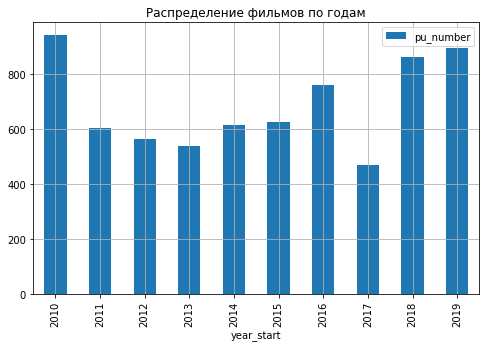

In [63]:
(df
 .pivot_table(
     index='year_start', 
     values='pu_number',
     aggfunc='count'
 )
 .plot(kind='bar',
       figsize=(8, 5), 
       grid=True,
       title='Распределение фильмов по годам')
);

А теперь возьмем только те строки, в которых есть информация о сборах

<AxesSubplot:title={'center':'Распределение фильмов с информацией о сборах по годам'}, xlabel='year_start'>

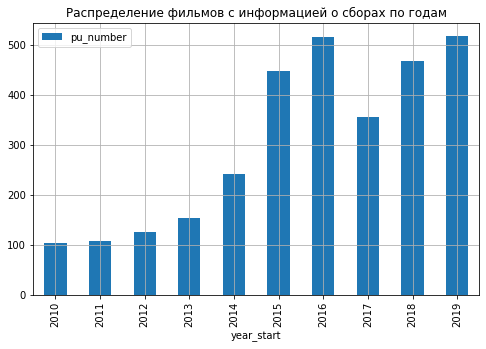

In [64]:
(df
 .loc[~df['box_office'].isna()]
 .pivot_table(
     index='year_start', 
     values='pu_number',
     aggfunc='count'
 )
 .plot(kind='bar', 
       figsize=(8, 5), 
       grid=True,
       title='Распределение фильмов с информацией о сборах по годам')
)

Больше всего фильмов было выпущено в 2010 году, но за этот год меньше всего информации о сборах. Аналогичная ситуация продолжается вплоть до 2015 года: фильмов много, информации о них - мало

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<AxesSubplot:title={'center':'Распределение сумм сборов по годам'}, xlabel='year_start'>

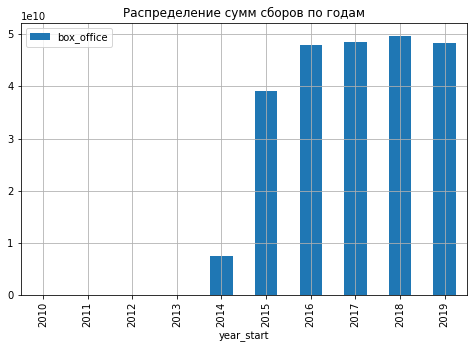

In [65]:
(df
 .loc[~df['box_office'].isna()]
 .pivot_table(
     index='year_start', 
     values='box_office',
     aggfunc='sum'
 )
 .plot(kind='bar', 
       figsize=(8, 5), 
       grid=True,
       title='Распределение сумм сборов по годам')
)

In [66]:
(df
 .loc[~df['box_office'].isna()]
 .pivot_table(
     index='year_start', 
     values='box_office',
     aggfunc='sum'
 )
)

,box_office
year_start,
2010,"2,425,499.00"
2011,"14,095,925.00"
2012,"6,894,293.00"
2013,"29,539,565.20"
2014,"7,439,092,059.90"
2015,"39,193,073,279.20"
2016,"47,864,341,535.91"
2017,"48,562,251,655.51"
2018,"49,622,654,083.77"


Самым прибыльным годом является 2018 - он принес почти 50 млрд рублей. Меньше всего сборов приходится на 2010 - 2,4 млн рублей.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [67]:
(df
 .loc[~df['box_office'].isna()]
 .pivot_table(
     index='year_start', 
     values='box_office',
     aggfunc={'mean', 'median'}
 )
)

,mean,median
year_start,,
2010,"23,548.53","1,700.00"
2011,"131,737.62","3,000.00"
2012,"55,154.34","5,560.00"
2013,"191,815.36","4,717.50"
2014,"30,740,049.83","69,120.00"
2015,"87,484,538.57","5,244,391.50"
2016,"92,760,351.81","4,177,689.05"
2017,"136,410,819.26","10,177,833.50"
2018,"106,031,312.14","8,911,533.94"


Общая тенденция восходящая - сборы растут.<br>
Также можно заметить, как средняя на примерно два порядка больше медианной суммы. Это может быть вызвано единичным фильмами, которые "разорвали" кассы.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

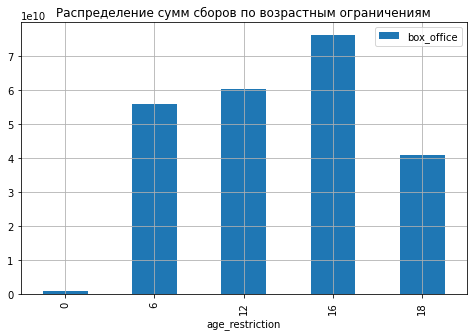

In [68]:
(df
 .query('2015 <= year_start <= 2019')
 .loc[~df['box_office'].isna()]
 .pivot_table(
     index='age_restriction', 
     values='box_office',
     aggfunc='sum'
 )
 .plot(kind='bar', 
       figsize=(8, 5), 
       grid=True,
       title='Распределение сумм сборов по возрастным ограничениям')
);

Лидируют фильмы 16+. <br>
Посмотрим, меняется ли картина в зависимости от года

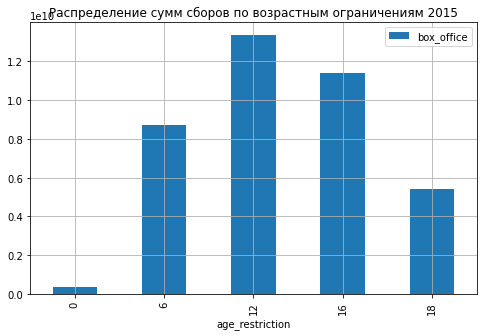

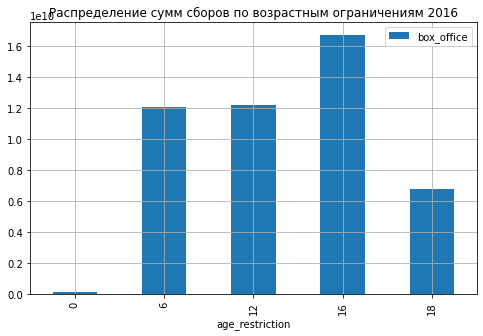

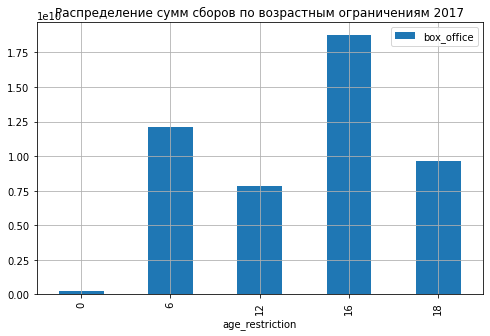

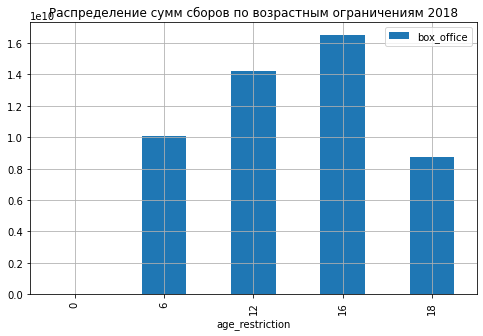

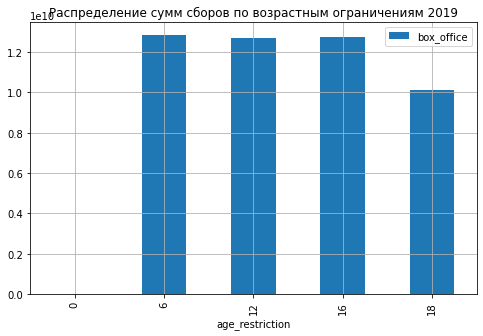

In [69]:
for year in range(2015, 2020):
    (df
     .query('year_start == @year')
     .loc[~df['box_office'].isna()]
     .pivot_table(
         index='age_restriction', 
         values='box_office',
         aggfunc='sum'
     )
     .plot(kind='bar', 
           figsize=(8, 5), 
           grid=True,
           title='Распределение сумм сборов по возрастным ограничениям ' + str(year))
    );

В 2015 мы видим явное преобладание фильмов 12+, затем три года подряд акцент смещен к фильмам 16+. В 2019 интерес к различным категориям сравнялся (к фильмам 16+ интерес снизился)

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

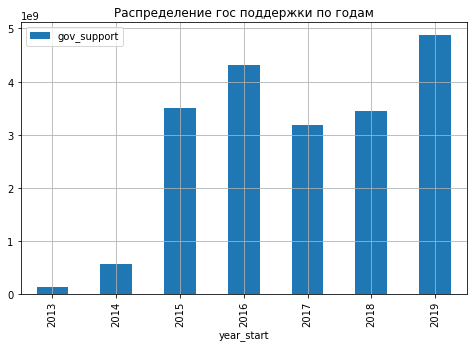

In [70]:
(df
 .loc[~df['gov_support'].isna()]
 .pivot_table(
     index='year_start', 
     values='gov_support',
     aggfunc='sum'
 )
 .plot(kind='bar', 
       figsize=(8, 5), 
       grid=True,
       title='Распределение гос поддержки по годам')
);

В целом, количество денег, выделяемых на кино с каждым годом растет. Общий максимум по выборке приходится на 2019 год. Есть еще один локальный максимум - 2016.<br>
Возможно, данный рост связан с инфляцией. Посмотрим, как менялась доля гос поддержки от общего бюджета.

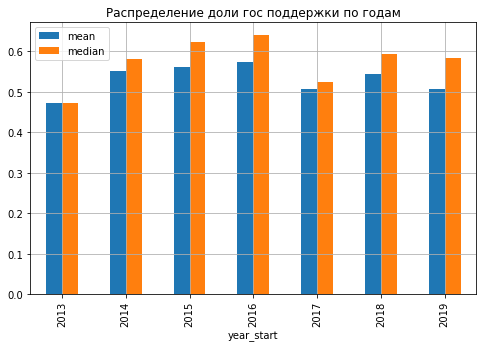

In [71]:
(df
 .loc[~df['gov_support'].isna()]
 .pivot_table(
     index='year_start', 
     values='gov_support_ratio',
     aggfunc={'median', 'mean'}
 )
 .plot(kind='bar', 
       figsize=(8, 5), 
       grid=True,
       title='Распределение доли гос поддержки по годам')
);

Инфляция творит чудеса и приукрашивает графики. На самом деле доля гос поддержки все время оставалась на примерно одинаковом уровне - 50-60%

Посмотрим, как отличается медиана рейтингов фильмов с гос поддержкой и без нее

In [72]:
# с гос поддержкой
df.loc[~df['gov_support'].isna()]['ratings'].median()

6.2

In [73]:
# без гос поддержки
df.loc[df['gov_support'].isna()]['ratings'].median()

6.6

Возможно, причина кроется в несопоставимых размерах выборок фильмов с гос поддержкой и без нее, но на данный момент фильмы без гос поддержки набирают больший рейтинг(на 0.4 больше)

Посмотрим, как окупаются фильмы с гос поддержкой

In [74]:
(df.loc[~df['gov_support'].isna()]['box_office'] / df.loc[~df['gov_support'].isna()]['budget']).mean()

0.8248654737371452

In [75]:
(df.loc[~df['gov_support'].isna()]['box_office'] / df.loc[~df['gov_support'].isna()]['budget']).describe()

count   317.00
mean      0.82
std       1.69
min       0.00
25%       0.02
50%       0.18
75%       0.97
max      19.21
dtype: float64

В большинстве случаев, фильмы с гос поддержкой не окупаются. В среднем, такие фильмы теряют 20%.

Исследуем, как распределяются возрастные ограничения на фильмы с гос поддержкой

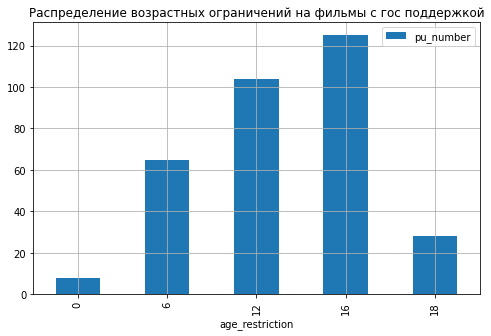

In [76]:
(df
 .loc[~df['gov_support'].isna()]
 .pivot_table(
     index='age_restriction', 
     values='pu_number',
     aggfunc='count'
 )
 .plot(kind='bar', 
       figsize=(8, 5), 
       grid=True,
       title='Распределение возрастных ограничений на фильмы с гос поддержкой')
);

Большего всего фильмов 16+

Посмотрим, какой источник государственного финансирования приносит больше прибыли(или меньше теряет)

In [77]:
df['profit'] = df['box_office'] / df['budget']

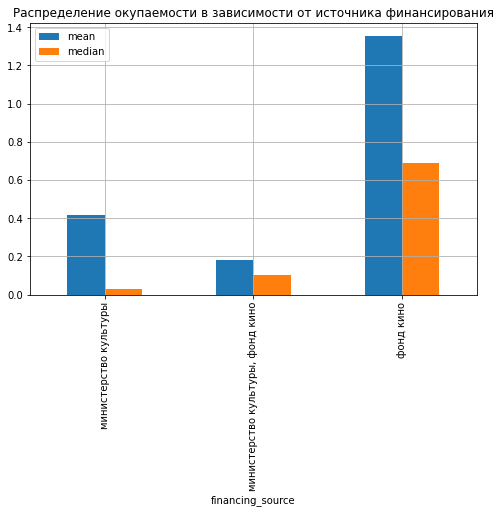

In [78]:
(df
 .loc[~df['gov_support'].isna()]
 .pivot_table(
     index='financing_source', 
     values='profit',
     aggfunc={'mean', 'median'}
 )
 .plot(kind='bar', 
       figsize=(8, 5), 
       grid=True,
       title='Распределение окупаемости в зависимости от источника финансирования')
);

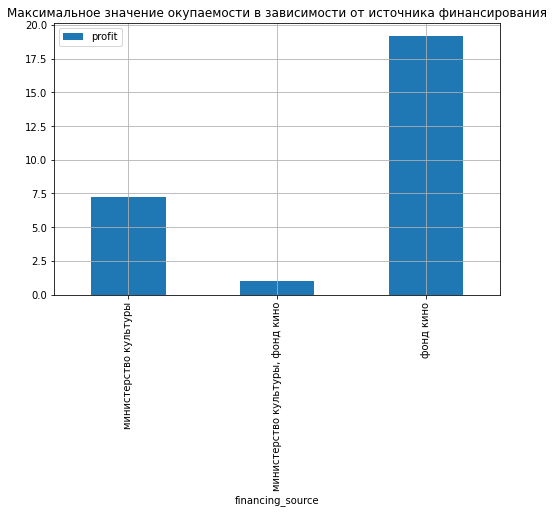

In [79]:
(df
 .loc[~df['gov_support'].isna()]
 .pivot_table(
     index='financing_source', 
     values='profit',
     aggfunc='max'
 )
 .plot(kind='bar', 
       figsize=(8, 5), 
       grid=True,
       title='Максимальное значение окупаемости в зависимости от источника финансирования')
);

Проекты Фонда кино более выгодные и успешные по сравнению с проектами министерства культуры и их совместными проектами.

### Шаг 5. Напишите общий вывод

Представленный набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск<br>
Первым делом данные из двух файлов были объединены в один датафрейм путем сопоставления прокатных удостоверений, представленных в двух файлах. Важно упомянуть о наличии одного пропуска в столбце с номером прокатного удостоверения. Соответствующая строка была удалена.<br>
Затронув тему пропусков, следует отметить следующие действия, предпринятые в отношении пропусков в датафрейме:
1) Удалены строки с пропусками в столбцах film_studio, production_country, director, producer<br>
2) Пропуски в столбцах genres и financing_source заполнены 'unknown'<br>
3) Пропуски в столбцах refundable_support, nonrefundable_support, budget оставлены без изменений <br>
<br>
Данные в таблице приведены к корректным типам.<br>
Для удобства дальнейшего анализа добавлены новые столбцы: год начала проката, имя и фамилия главного режиссёра и основной жанр фильма, доля гос поддержки от общего бюджета и суммарный размер гос поддержки<br><br>
В ходе анализа были выявлены следующие закономерности и факты:
1) Самым полным периодом следует считать 2015-2017 года. До 2014 включительно информации слишком мало. Начиная с 2018, наблюдается спад осведомленности о сборах.<br>
2) Больше всего фильмов было выпущено в 2010 году, но за этот год меньше всего информации о сборах. Аналогичная ситуация продолжается вплоть до 2015 года: фильмов много, информации о них - мало <br>
3) Самым прибыльным годом является 2018 - он принес почти 50 млрд рублей. Меньше всего сборов приходится на 2010 - 2,4 млн рублей. <br>
4) Общая тенденция сборов восходящая - сборы растут. Также можно заметить, как средняя на примерно два порядка больше медианной суммы. Это может быть вызвано единичным фильмами, которые "разорвали" кассы. <br>
5) В общем, в прокате лидируют фильмы 16 Если посмотреть статистику по годам, можно увидеть, как в 2015 присутствует явное преобладание фильмов 12+, затем три года подряд акцент смещен к фильмам 16+. В 2019 интерес к различным категориям сравнялся (к фильмам 16+ интерес снизился)<br>
6) Доля средств в бюджете, выделенных государством, каждый год остается примерно на одном уровне - 50-60% <br>
7) Фильмы без гос поддержки набирают рейтинг больше, в среднем, на 0.4<br>
8) В большинстве случаев, фильмы с гос поддержкой не окупаются, а теряют 20% от вложенного бюджета <br>
9) Проекты Фонда кино более выгодные и успешные по сравнению с проектами министерства культуры и их совместными проектами.<br>